In [1]:
from periodic_orbits import is_periodic, is_equilibrium, stg_coordinate, get_periodic_domains
from ode_functions import theta_from_param,ic_function, fun, convert_to_dict, get_parameter_node, get_ic_domain, plot_projections, plot_time_series, plot_phase_projection
from ipynb.fs.full.ode_functions import *
from periodic_orbits2 import check_sequence
import scipy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from sklearn.decomposition import PCA

In [2]:
#decay rates
decays = {'d_p' : 1, 'd_mc' : 1, 'd_mn' : 1}

#hill coefficient
n = 90

#ode solver parameters
t0 = 0
tf = 100

In [3]:
#Import parameters

mb1 = pd.read_csv("Parameter_datasets/P1MBBWnode1.csv", header = None)
mbparams1 = convert_to_dict(mb1)

mb2 = pd.read_csv("Parameter_datasets/P1MBBWnode2.csv", header = None)
mbparams2 = convert_to_dict(mb2)

mb3 = pd.read_csv("Parameter_datasets/P1MBBWnode3.csv", header = None)
mbparams3 = convert_to_dict(mb3)

mb4 = pd.read_csv("Parameter_datasets/P1MBBWnode4.csv", header = None)
mbparams4 = convert_to_dict(mb4)

mb5 = pd.read_csv("Parameter_datasets/P1MBBWnode5.csv", header = None)
mbparams5 = convert_to_dict(mb5)

mb6 = pd.read_csv("Parameter_datasets/P1MBBWnode6.csv", header = None)
mbparams6 = convert_to_dict(mb6)

mb7 = pd.read_csv("Parameter_datasets/P1MBBWnode7.csv", header = None)
mbparams7 = convert_to_dict(mb7)

mb8 = pd.read_csv("Parameter_datasets/P1MBBWnode8.csv", header = None)
mbparams8 = convert_to_dict(mb8)

mb9 = pd.read_csv("Parameter_datasets/P1MBBWnode9.csv", header = None)
mbparams9 = convert_to_dict(mb9)

mb10 = pd.read_csv("Parameter_datasets/P1MBBWnode10.csv", header = None)
mbparams10 = convert_to_dict(mb10)

mb_params = [mbparams1, mbparams2, mbparams3, mbparams4, mbparams5, mbparams6, mbparams7, mbparams8, mbparams9,
             mbparams10]

In [4]:
#generate ICs in 111 region of parameter 1
mb_ICs = []
for i in range(10):
    mb_ICs.append(ic_function("111", mb_params[0]))#can split at 111

In [5]:
#compute orbit lengths for all parameter, initial condition combinations
mb_lengths = []#store orbit lengths, each set of 10 lengths corresponds to different ICs within same parameter
mb_sizes = []
for param in mb_params:
    theta = theta_from_param(param)
    for IC in mb_ICs:
        sol = scipy.integrate.solve_ivp(lambda t,y: fun(t,y,param,n,decays), [0,tf], y0 = IC, method = 'BDF')
        output = get_periodic_domains(sol.y,theta,num_periods_to_verify = 2)
        mb_lengths.append(len(output))
        mb_sizes.append(upper_double_id(output))

/Users/Erika/Documents/Math/Research/periodic_orbits.py:96: UserWarning: get_periodic_domains looked at all time points but did not verify a periodic sequence to desired verification level of num_periods_to_verify = 2. The trajectory may not be periodic.
  warnings.warn('get_periodic_domains looked at all time points but did not verify a periodic sequence to desired verification level of num_periods_to_verify = {}. The trajectory may not be periodic.'.format(num_periods_to_verify))


In [6]:
#observe orbit lengths (columns are different initial conditions)
endpts = [0,10,20,30,40,50,60,70,80,90,100]
for i in range(len(endpts)-1):
    print('mb_param', i, ':', mb_lengths[endpts[i]:endpts[i+1]])

mb_param 0 : [6, 6, 6, 6, 6, 6, 6, 6, 6, 6]
mb_param 1 : [6, 6, 6, 6, 6, 6, 6, 6, 6, 6]
mb_param 2 : [9, 10, 99, 10, 10, 10, 10, 10, 10, 10]
mb_param 3 : [10, 10, 9, 10, 54, 9, 10, 9, 9, 10]
mb_param 4 : [126, 8, 27, 160, 8, 9, 168, 10, 120, 8]
mb_param 5 : [9, 9, 9, 9, 10, 9, 9, 10, 9, 9]
mb_param 6 : [9, 9, 9, 9, 9, 110, 9, 10, 9, 9]
mb_param 7 : [8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
mb_param 8 : [6, 6, 6, 6, 6, 6, 6, 6, 6, 6]
mb_param 9 : [104, 80, 10, 70, 9, 8, 8, 8, 27, 36]


No consistency here... Go back through and identify by size, not length (expect an upper double loop)

In [7]:
#observe orbit lengths (columns are different initial conditions)
endpts = [0,10,20,30,40,50,60,70,80,90,100]
for i in range(len(endpts)-1):
    print('mb_param', i, ':', mb_sizes[endpts[i]:endpts[i+1]])

mb_param 0 : ['Small', 'Small', 'Small', 'Small', 'Small', 'Small', 'Small', 'Small', 'Small', 'Small']
mb_param 1 : ['Small', 'Small', 'Small', 'Small', 'Small', 'Small', 'Small', 'Small', 'Small', 'Small']
mb_param 2 : ['Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large']
mb_param 3 : ['Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large']
mb_param 4 : ['Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large']
mb_param 5 : ['Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large']
mb_param 6 : ['Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large']
mb_param 7 : ['Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large']
mb_param 8 : ['Small', 'Small', 'Small', 'Small', 'Small', 'Small', 'Small', 'Small', 'Small', 'Small']
mb_param 9 : ['Large', 'Large', 'Large', 'Large', 'Large', 'Larg

Now we see consistent results. Use this identifier for linear connection and PCA.

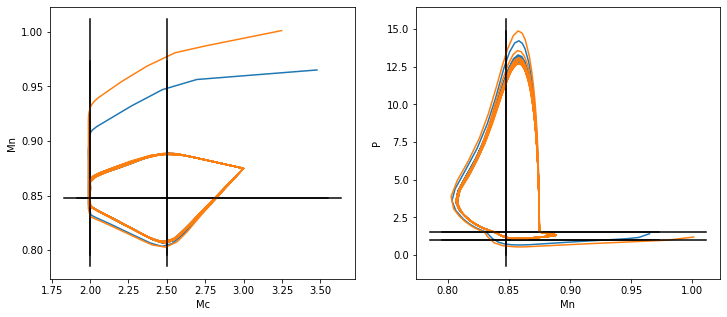

In [8]:
#plotting framework
param = mb_params[0]
sol0 = scipy.integrate.solve_ivp(lambda t,y: fun(t,y,param,n,decays), [0,tf], y0 = mb_ICs[0], method = 'BDF')
sol1 = scipy.integrate.solve_ivp(lambda t,y: fun(t,y,param,n,decays), [0,tf], y0 = mb_ICs[1], method = 'BDF')

fig,(ax1,ax2) = plot_projections(sol0, param)
plot_projections(sol1, param, axs = (ax1, ax2))
# ax1.set_xlim(1,2.75)
# # ax1.set_ylim(0.3,0.8)
# ax2.set_xlim(0.6,1)
# ax2.set_ylim(0,8.5)

Now, examine all possible lines of parameters between length 6 and a length 8 orbits to see if hysteresis is a possibility.

In [9]:
large, small = separate(mb_params, '111')

/Users/Erika/Documents/Math/Research/periodic_orbits.py:96: UserWarning: get_periodic_domains looked at all time points but did not verify a periodic sequence to desired verification level of num_periods_to_verify = 2. The trajectory may not be periodic.
  warnings.warn('get_periodic_domains looked at all time points but did not verify a periodic sequence to desired verification level of num_periods_to_verify = {}. The trajectory may not be periodic.'.format(num_periods_to_verify))


In [10]:
line_list = generate_all_lines(small, large, 50)

In [11]:
%%time
check_list(line_list)

ipynb.fs.full.ode_functions:153: RuntimeWarning: overflow encountered in double_scalars
ipynb.fs.full.ode_functions:153: RuntimeWarning: invalid value encountered in double_scalars
ipynb.fs.full.ode_functions:155: RuntimeWarning: overflow encountered in double_scalars
/Users/Erika/opt/anaconda3/lib/python3.7/site-packages/scipy/integrate/_ivp/common.py:305: RuntimeWarning: invalid value encountered in greater_equal
  f_sign = 2 * (np.real(f) >= 0).astype(float) - 1
/Users/Erika/opt/anaconda3/lib/python3.7/site-packages/scipy/integrate/_ivp/common.py:334: RuntimeWarning: invalid value encountered in less
  diff_too_small = max_diff < NUM_JAC_DIFF_REJECT * scale
/Users/Erika/opt/anaconda3/lib/python3.7/site-packages/scipy/integrate/_ivp/common.py:359: RuntimeWarning: invalid value encountered in less
  factor[max_diff < NUM_JAC_DIFF_SMALL * scale] *= NUM_JAC_FACTOR_INCREASE
/Users/Erika/opt/anaconda3/lib/python3.7/site-packages/scipy/integrate/_ivp/common.py:360: RuntimeWarning: invalid 

ValueError: array must not contain infs or NaNs

In [12]:
#0 is small, 1 is large
mb_param_colors = [0,0,1,1,1,1,1,1,0,1]

mbdf1 = pd.DataFrame.from_dict(mbparams1, orient = 'index')
mbdf1 = mbdf1.T
mbdf2 = pd.DataFrame.from_dict(mbparams2, orient = 'index')
mbdf2 = mbdf2.T
mbdf3 = pd.DataFrame.from_dict(mbparams3, orient = 'index')
mbdf3 = mbdf3.T
mbdf4 = pd.DataFrame.from_dict(mbparams4, orient = 'index')
mbdf4 = mbdf4.T
mbdf5 = pd.DataFrame.from_dict(mbparams5, orient = 'index')
mbdf5 = mbdf5.T
mbdf6 = pd.DataFrame.from_dict(mbparams6, orient = 'index')
mbdf6 = mbdf6.T
mbdf7 = pd.DataFrame.from_dict(mbparams7, orient = 'index')
mbdf7 = mbdf7.T
mbdf8 = pd.DataFrame.from_dict(mbparams8, orient = 'index')
mbdf8 = mbdf8.T
mbdf9 = pd.DataFrame.from_dict(mbparams9, orient = 'index')
mbdf9 = mbdf9.T
mbdf10 = pd.DataFrame.from_dict(mbparams10, orient = 'index')
mbdf10 = mbdf10.T

mb_param_data = pd.concat([mbdf1,mbdf2,mbdf3,mbdf4,mbdf5,mbdf6,mbdf7,mbdf8,mbdf9,mbdf10])

mb_param_data['OrbitLength'] = mb_param_colors

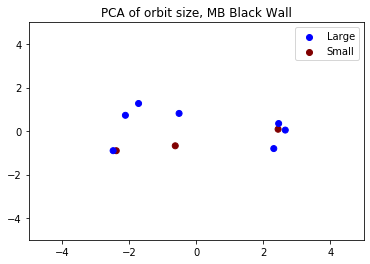

In [13]:
pca = PCA(n_components = 2)
pca.fit(mb_param_data.iloc[:,0:17])
mb_pca = pca.transform(mb_param_data.iloc[:,0:17])

labels = mb_param_data.loc[:,'OrbitLength']
label_colors = {0:'maroon',1:'blue'}
cvec = [label_colors[label] for label in labels]
plt.scatter(mb_pca[:,0],mb_pca[:,1], c = cvec)
plt.scatter(25,25,c = 'blue',label = 'Large')#point at (25,25) just for labeling purposes
plt.scatter(25,25,c = 'maroon', label = 'Small')
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.title('PCA of orbit size, MB Black Wall')
plt.legend(loc = 'best')
# plt.savefig('pca_all_attributes.png')
plt.show()
plt.close()

This one doesn't appear to have much spatial separation by orbit size.